In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.datasets import load_digits

In [5]:
digits=load_digits()
import matplotlib.pyplot as plt

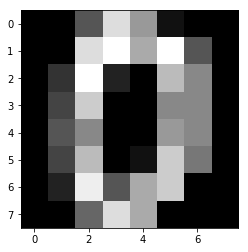

In [11]:
plt.imshow(digits.images[0],cmap='gray')

In [12]:
dt=DecisionTreeClassifier(max_depth=10)

In [13]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(digits.data,digits.target)

In [14]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
dt.score(testX,testY)

0.8311111111111111

In [16]:
dt.score(trainX,trainY)

0.9866369710467706

In [19]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt,digits.data,digits.target)
scores.mean()

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7813789350136542

In [21]:
#exhaustive grid search
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)
dt=DecisionTreeClassifier()

In [23]:
from sklearn.model_selection import GridSearchCV
gridsearchcv=GridSearchCV(dt,param_grid={'max_depth':range(5,30,5)},cv=5)

In [27]:
gridsearchcv.fit(digits.data,digits.target)
gridsearchcv.best_params_
gridsearchcv.best_score_
gridsearchcv.best_estimator_

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
#comparing grid and randomsearchcv
from time import time
from scipy.stats import randint
X=digits.data
Y=digits.target

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [39]:
param_dist={
            "max_depth":[3,None],
            "max_features":randint(1,11),
            "min_samples_split":randint(2,11),
            "bootstrap":[True,False],
            "criterion":["gini","entropy"]
    
}
rf=RandomForestClassifier(n_estimators=20)
n_iter_search=20
random_search=RandomizedSearchCV(rf,param_distributions=param_dist,n_iter=n_iter_search,cv=5)
start=time()
random_search.fit(X,Y)
print('random search took %.2f'%(time()-start))
print(random_search.best_score_)

random search took 4.47
0.9337785197551475


/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
grid_search=GridSearchCV(rf,param_grid=param_grid,cv=5)
start=time()
grid_search.fit(X,Y)
print('grid search took %.2f'%(time()-start))
print(grid_search.best_score_)

grid search took 15.58
0.9348914858096828


/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
#model evaluation
trainx,testx,trainy,testy=train_test_split(X,Y)

In [46]:
rf.fit(trainx,trainy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
#using score method
rf.score(testx,testy)

0.9622222222222222

In [48]:
#using cross val score
cross_val_score(rf,X,Y,cv=5)

array([0.92032967, 0.88674033, 0.9275766 , 0.93277311, 0.89859155])

In [49]:
from sklearn.datasets import load_breast_cancer
dt=DecisionTreeClassifier()
cancer_data=load_breast_cancer()
trainx,testx,trainy,testy=train_test_split(cancer_data.data,cancer_data.target)

In [50]:
dt.fit(trainx,trainy)
pred=dt.predict(testx)

In [59]:
#using metrics module
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
print(accuracy_score(testy,pred))
print(confusion_matrix(testy,pred))

0.9440559440559441
[[48  5]
 [ 3 87]]


In [60]:
print(precision_score(testy,pred))
print(recall_score(testy,pred))
print(f1_score(testy,pred))

0.9456521739130435
0.9666666666666667
0.956043956043956


In [63]:
#regression metrics
from sklearn.datasets import california_housing
housing_data=california_housing.fetch_california_housing()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(housing_data.data,housing_data.target)
pred=lr.predict(housing_data.data)

In [66]:
from sklearn import metrics
print(metrics.mean_squared_error(pred,housing_data.target))
print(metrics.mean_absolute_error(pred,housing_data.target))
print(metrics.r2_score(pred,housing_data.target))

0.5243209861846072
0.5311643817546468
0.35046835247687946


In [71]:
#clustering metrics
from sklearn.metrics.cluster import completeness_score
completeness_score([10,10,11,11],[12,12,1,1])

1.0

In [72]:
completeness_score([11,22,22,11],[1,0,1,1])

0.3836885465963443

In [73]:
completeness_score([10,10,11,11],[0,0,0,0])

1.0

In [75]:
from sklearn.metrics.cluster import homogeneity_score
print(homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0]))
print(homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))
print(homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0]))

1.0
0.9999999999999999
1.0


In [76]:


from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)



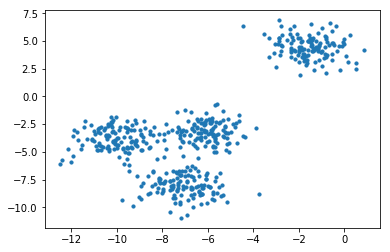

In [78]:
plt.scatter(X[:,0],X[:,1],s=10)

In [79]:
range_n_clusters=[2,3,4,5,6]

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabaz_score

In [84]:
for n_cluster in range_n_clusters:
    kmeans=KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels=kmeans.predict(X)
    print(n_cluster,silhouette_score(X,labels))

2 0.7049787496083261
3 0.5882004012129721
4 0.6505186632729437
5 0.5745029081702377
6 0.45438291745928583


In [85]:
for n_cluster in range_n_clusters:
    kmeans=KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels=kmeans.predict(X)
    print(n_cluster,calinski_harabaz_score(X,labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121097
5 2282.058733986897
6 2016.1781260661603


In [87]:
#model persistance
#use pickle and joblib 
import pickle
s=pickle.dumps(dt)

In [89]:
pickle.loads(s)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
type(s)

bytes

In [92]:
from sklearn.externals import joblib
joblib.dump(dt,'dt.joblib')

['dt.joblib']

In [93]:
dt=joblib.load('dt.joblib')
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
#validation curves
import numpy as np
from sklearn.model_selection import validation_curve
param_range=np.arange(1,50,2)
param_range
train_scores,test_scores=validation_curve(RandomForestClassifier(),
                                         digits.data,digits.target,
                                         param_name='n_estimators',
                                         param_range=param_range,
                                         cv=3,
                                         scoring='accuracy',
                                         n_jobs=-1)

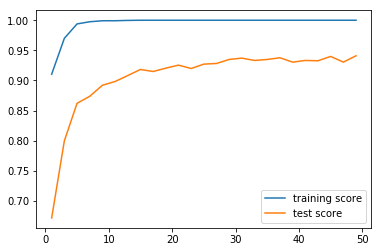

In [106]:
train_mean=np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range,train_mean,label='training score')

plt.plot(param_range,test_mean,label='test score')
plt.legend()


In [103]:
train_scores.shape

(25, 3)

In [104]:
train_mean.shape

(25,)